REFERENCES

1.	https://www.kaggle.com/code/lampubhutia/iris-linear-regression/notebook
2.	https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
3.	https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82
4.	https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1
5.	https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/r/iris_lm/


In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets

opendatasets.download("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

8192it [00:00, 52777.34it/s]            


In [ ]:
from pandas.io.parsers.readers import read_csv
import pandas as pd

data=read_csv("/content/iris.data")
data=pd.DataFrame(data)
data


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.columns=['sepal_length','sepal_width','petal_length','petal_width','type']
data

,sepal_length,sepal_width,petal_length,petal_width,type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isnull().any()


sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
type            False
dtype: bool

In [ ]:
src = data['type'].unique()
print(src)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
import numpy as np
display(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
type             object
dtype: object

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['type'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: type, dtype: int64

In [ ]:
rows, col = data.shape
data.shape


(149, 5)

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



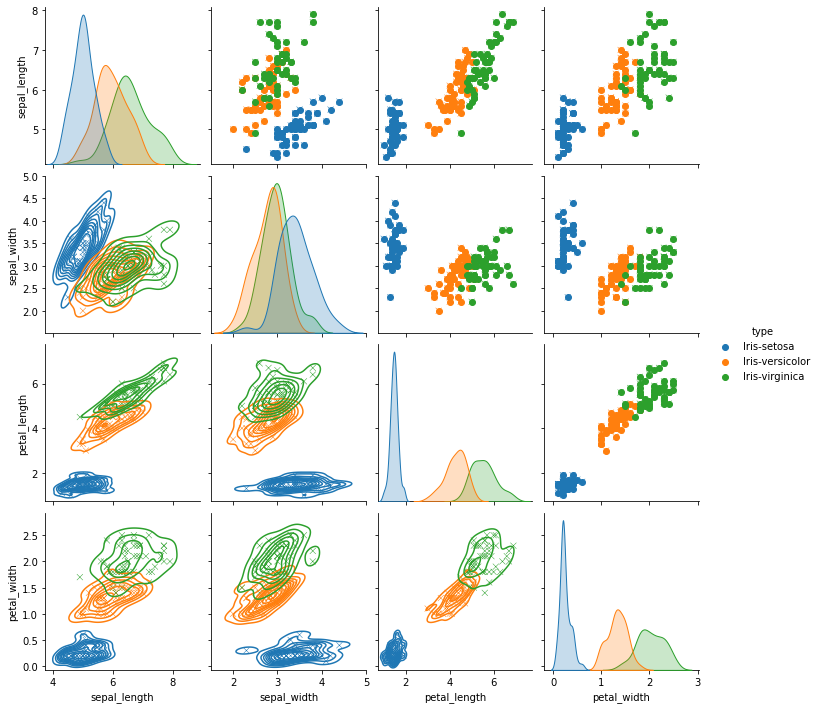

In [ ]:
g = sns.pairplot(data, hue='type', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

In [ ]:
y=data['type']
x=data.drop('type',axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [ ]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

x = data.drop(['type'], axis=1).values 
y = data['type'].replace(mapping).values.reshape(rows,1)

x = np.hstack(((np.ones((rows,1))), x))

In [ ]:
x

array([[1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4.7, 3.2, 1.6, 0.2],
       [1. , 4

In [ ]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [ ]:
y.shape

(149, 1)

In [ ]:
x.shape

(149, 5)

In [ ]:
def computeCost(x, y, theta):
    inner_product = (np.dot(x, theta.T) - y) ** 2
    return np.sum(inner_product) / (2 * len(x))

In [ ]:
np.random.seed(0) 
theta = np.random.randn(5,1)

print("Theta : %s" % (theta))

Theta : [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]
 [1.86755799]]


In [ ]:
theta.shape

(5, 1)

In [ ]:
theta.ravel()

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799])

In [ ]:
def compute_cost(x, y, theta):

  predictions = x.dot(theta)
  
  errors = np.subtract(predictions, y)
  
  sqrErrors = np.square(errors)
 
  J = 1/(2 * rows) * errors.T.dot(errors)

  return J

In [ ]:
def gradient_descent(x, y, theta, alpha, iterations):
 
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = x.dot(theta)
    
   
    sum_delta = (alpha / rows) * x.transpose().dot(errors);
   
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(x, y, theta)  

    return theta, cost_history

In [ ]:

iterations = 1000;
alpha = 0.001

In [ ]:
theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[: 5])
print('Last 5 values from cost_history =', cost_history[: -5])

Final value of theta = [[1.74825928]
 [0.30429985]
 [0.93115909]
 [2.17315776]
 [1.84507594]]
First 5 values from cost_history = [119.39032251   0.           0.           0.           0.        ]
Last 5 values from cost_history = [119.39032251   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           

In [ ]:
prediction = np.round(np.dot(x_train, theta))

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/4,random_state=0)

for i in range(2,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/4,random_state=42)
    theta, cost_history = gradient_descent(x_train, y_train, theta, alpha, iterations)
    prediction = np.round(np.dot(x_test, theta))
    lin_mae = mean_absolute_error(y_test, prediction)
    print(lin_mae)
    print("cross validation score for %d comparisions: %0.2f (+/- %0.2f)" % (i,lin_mae.mean(), lin_mae.std() * 2))

9.131578947368421
cross validation score for 2 comparisions: 9.13 (+/- 0.00)
8.81578947368421
cross validation score for 3 comparisions: 8.82 (+/- 0.00)
8.289473684210526
cross validation score for 4 comparisions: 8.29 (+/- 0.00)
7.921052631578948
cross validation score for 5 comparisions: 7.92 (+/- 0.00)
7.605263157894737
cross validation score for 6 comparisions: 7.61 (+/- 0.00)
7.157894736842105
cross validation score for 7 comparisions: 7.16 (+/- 0.00)
6.7368421052631575
cross validation score for 8 comparisions: 6.74 (+/- 0.00)
6.447368421052632
cross validation score for 9 comparisions: 6.45 (+/- 0.00)
